In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fifa-2022-players/fifa22.csv


#  **Introduction**

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import os

os.listdir('/kaggle/input')

# Load the .csv data into a DataFrame
data_df = pd.read_csv("/kaggle/input/fifa-2022-players/fifa22.csv")
# Display the first 5 rows of the dataset
data_df.head(5)

,name,rank,gender,wage_eur,log_wage,position,nationality,club,league,preferred_foot,shooting,passing,dribbling,defending,attacking,skill,movement,power,mentality,goalkeeping
0,Lionel Andrés Messi Cuccittini,93,M,320000.0,12.676076,RW,Argentina,Paris Saint-Germain,French Ligue 1,Left,92.0,91.0,95.0,26.333333,85.8,94.0,90.2,77.8,73.833333,10.8
1,Lucia Roberta Tough Bronze,92,F,NaN,NaN,NaN,England,NaN,NaN,Right,61.0,70.0,81.0,89.000000,69.0,62.2,84.2,78.8,69.166667,12.6
2,Vivianne Miedema,92,F,NaN,NaN,NaN,Netherlands,NaN,NaN,Right,93.0,75.0,88.0,25.000000,86.0,79.0,80.6,84.0,70.833333,15.6
3,Wéndèleine Thérèse Renard,92,F,NaN,NaN,NaN,France,NaN,NaN,Right,70.0,62.0,73.0,91.333333,62.6,67.8,64.0,82.4,73.500000,12.8
4,Robert Lewandowski,92,M,270000.0,12.506177,ST,Poland,FC Bayern München,German 1. Bundesliga,Right,92.0,79.0,86.0,32.000000,86.0,81.4,81.6,84.8,80.666667,10.2


The unit of analysis in this dataset are the football players.

# **Exploratory Data Analysis (EDA)**

In [3]:
print("There are " + str(len(data_df)) + " observations and " + str(len(data_df.columns)) + " features.")

There are 19630 observations and 20 features.


In [4]:
gender = data_df["gender"].value_counts()
male_players = gender["M"]
female_players = gender["F"]

print("Number of male players:", male_players)
print("Number of female players:", female_players)

Number of male players: 19239
Number of female players: 391


In [5]:
# Remove rows with missing values in the "passing" column
data_df = data_df.dropna(subset = ["passing"])
print("Shape of final dataset:", data_df.shape)

Shape of final dataset: (17450, 20)


# **Data Analysis and Interpretation**

In [6]:
import statsmodels.api as smf

# Estimate a multiple regression evaluating the effect on rank of four features: passing, attacking, defending, and skill
x_axis = data_df[["passing", "attacking", "defending", "skill"]]
y_axis = data_df["rank"]
x_axis = smf.add_constant(x_axis)
model = smf.OLS(y_axis, x_axis).fit()

print(model.summary())

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


                            OLS Regression Results                            
Dep. Variable:                   rank   R-squared:                       0.705
Model:                            OLS   Adj. R-squared:                  0.705
Method:                 Least Squares   F-statistic:                 1.044e+04
Date:                Thu, 10 Aug 2023   Prob (F-statistic):               0.00
Time:                        12:10:23   Log-Likelihood:                -47856.
No. Observations:               17450   AIC:                         9.572e+04
Df Residuals:                   17445   BIC:                         9.576e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         25.3278      0.203    124.785      0.0

In [7]:
r_squared = model.rsquared
print("R-squared value:", r_squared)

R-squared value: 0.7052478740013822


We can use the R-squared value to determine how much of the variation in “rank” is explained by our features, “passing,” “attacking,” “defending,” and “skill.” Our R-squared value is 0.705, which means that approximately 70.5% of the variation in rank is explained by our features.

We can check if any of our features are significant at the 1% level by checking their p-values. The independent variables “attacking” and “defending” have p-values of 0.00. This means that they are below 0.01 and are therefore statistically significant.

The coeﬀicient in the regression output tells us the estimated effect of a one-unit increase in the “skill” variable on the rank, while holding the other independent variables constant. The coeﬀicient for “skill” is 0.0066, which means that a one-unit increase in “skill” will increase 0.0066 units in rank. Therefore, if all other variables are held constant, a football player with one more unit of skill is expected to have a 0.0066 higher rank.

# **Model Evaluation and Testing**

We will use SciKit Learn and a test/train split to see how well our model – using the same DV and IVs – can predict a player’s rank.

In [8]:
# Create an X dataframe with just four features: passing, attacking, defending, and skill
X = data_df[["passing", "attacking", "defending", "skill"]]
# Create a Y dataframe with just the “rank” variable
Y = data_df[["rank"]]

# Display the first five rows of each
print(X.head())
print()
print(Y.head())

   passing  attacking  defending  skill
0     91.0       85.8  26.333333   94.0
1     70.0       69.0  89.000000   62.2
2     75.0       86.0  25.000000   79.0
3     62.0       62.6  91.333333   67.8
4     79.0       86.0  32.000000   81.4

   rank
0    93
1    92
2    92
3    92
4    92


In [9]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets using train_test_split function
# X and Y are the input features and target variable respectively
# test_size specifies the proportion of data to allocate for testing (25% in this case)
# random_state is used to ensure reproducibility of the split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 123) 

# Print the first 5 rows of the X_train dataset
print(X_train.head(5))

       passing  attacking  defending  skill
17226     52.0       48.0  59.333333   53.2
13548     48.0       55.0  12.666667   54.0
17874     59.0       46.2  58.000000   57.8
19599     47.0       40.6  46.666667   40.0
15629     49.0       51.8  25.666667   49.6


In [10]:
from sklearn.linear_model import LinearRegression 

lr_model = LinearRegression()
# Fit the linear regression model using the training data
lr_model.fit(X_train, Y_train)

# Display the intercept and coefficients of trained model
print("Intercept:", lr_model.intercept_)
print("Coefficients:", lr_model.coef_)

Intercept: [25.16773306]
Coefficients: [[-0.02444506  0.61230756  0.17314968  0.00612364]]


In [11]:
# Use the trained linear regression model (lr_model) to make predictions on the testing data (X_test)
Y_pred = lr_model.predict(X_test)
# Print the predicted values for the first 3 instances in the testing data
print("Predicted values:", Y_pred[:3])

Predicted values: [[64.57617047]
 [72.78035994]
 [70.46341746]]


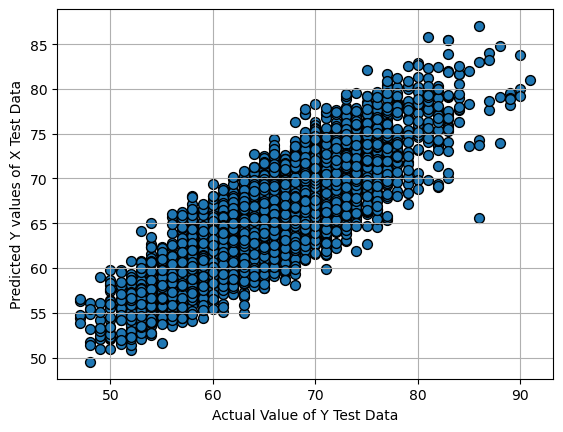

In [12]:
plt.scatter(Y_test, Y_pred, s = 50, edgecolors = "black")
plt.xlabel("Actual Value of Y Test Data")
plt.ylabel("Predicted Y values of X Test Data")
plt.grid()
plt.show()

In [13]:
from sklearn.metrics import mean_squared_error

# Display the Root Mean Squared Error (RMSE) for this model
rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
print('RMSE:', rmse)

RMSE: 3.7445626399871976


Overall, the scaterplot of predicted values against actual values shows fairly accurate predictions due to the fairly tight cluster of points around the line of best fit. However, there are still some points that are further away from the line of best fit, which means that the scatterplot is less accurate for those observations. In addition, our overall model only includes four features. Therefore, we may be lacking other variables that could better explain variation in rank.

# **Classification and Model Evaluation**

We will use KNN to try to classify players’ “preferred foot.

In [14]:
# Display the count of each value present in the preferred foot column
print(data_df["preferred_foot"].value_counts())

Right    13044
Left      4406
Name: preferred_foot, dtype: int64


In [15]:
right_foot_count = (data_df["preferred_foot"] == "Right").sum()
right_foot_percent = right_foot_count / len(data_df) * 100
print("Percentage of players who prefer their right foot:", round(right_foot_percent, 2), "%")

Percentage of players who prefer their right foot: 74.75 %


We want to build a classifier using 10 available dimensions: shooting, passing, dribbling, defending, attacking, skill, movement, power, mentality, and goalkeeping.

In [16]:
# Create an X dataframe with just these 10 columns and display the first 5 rows
X = data_df[["shooting", "passing", "dribbling", "defending", "attacking", "skill", "movement", "power", "mentality", "goalkeeping"]]
X.head(5)

,shooting,passing,dribbling,defending,attacking,skill,movement,power,mentality,goalkeeping
0,92.0,91.0,95.0,26.333333,85.8,94.0,90.2,77.8,73.833333,10.8
1,61.0,70.0,81.0,89.000000,69.0,62.2,84.2,78.8,69.166667,12.6
2,93.0,75.0,88.0,25.000000,86.0,79.0,80.6,84.0,70.833333,15.6
3,70.0,62.0,73.0,91.333333,62.6,67.8,64.0,82.4,73.500000,12.8
4,92.0,79.0,86.0,32.000000,86.0,81.4,81.6,84.8,80.666667,10.2


In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# Use the scaler to standardize (normalize) the input features (X)
X_scaled = scaler.fit_transform(X)
# Print the standardized (scaled) values of the first 3 instances
print(X_scaled[:3])

[[ 2.7843116   3.29664165  3.31535783 -1.39304935  3.40016362  3.54858025
   2.77464012  1.94428215  2.18061369  0.2816757 ]
 [ 0.59771861  1.22971891  1.87671942  2.13166681  1.59341682  0.59820902
   2.07280881  2.06650141  1.62369703  1.48110007]
 [ 2.85484686  1.72184337  2.59603862 -1.46804331  3.42167251  2.15689571
   1.65171003  2.70204154  1.82259584  3.48014068]]


In [18]:
# Split the scaled input features (X_scaled) and the "preferred_foot" target variable into training and testing sets using train_test_split function
# Here, test_size specifies the proportion of data to allocate for testing (30% in this case)
# random_state is used to ensure reproducibility of the split
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, data_df["preferred_foot"], test_size = 0.3, random_state = 456)
print(X_train[:3])

[[-2.01208594 -1.42775318 -1.51435684  0.44430269 -1.82649677 -1.57281886
  -0.96846017 -1.01342387 -1.55868391  0.54821445]
 [-0.46031026  0.34389488  0.74636066  0.4255542  -0.27785665  0.61676481
   0.69254058 -0.6467661  -0.30562141 -0.25140179]
 [ 0.31557757  0.1470451   0.12980134 -0.88684012  0.08779448  0.00442362
  -0.05607947 -0.40232758 -0.36529105 -1.85063428]]


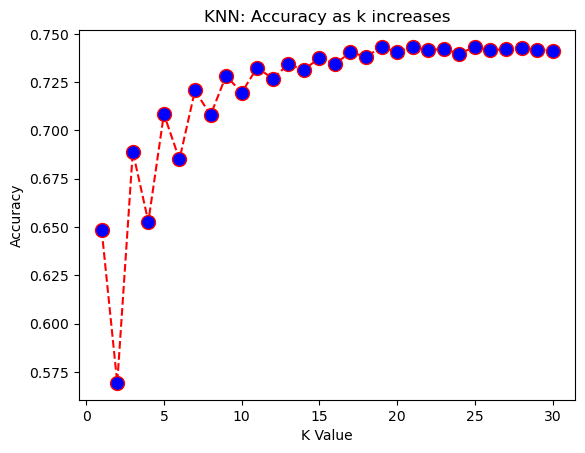

In [19]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import accuracy_score

# Reshape the Y_train values to be a 2D array
Y_train = Y_train.values.reshape(-1, 1)

# Create an empty list to store accuracy values for different k values
accuracy_values = []

# Loop through values of k from 1 to 30
for i in range(1, 31):
    
    # Create a KNeighborsClassifier instance with k neighbors
    knn = KNeighborsClassifier(n_neighbors = i) 
    
    # Fit the KNN classifier to the training data
    knn.fit(X_train, Y_train.flatten())
    
    # Make predictions using the trained KNN classifier
    Y_pred = knn.predict(X_test)
    
    # Calculate accuracy of the predictions
    accuracy = accuracy_score(Y_test, Y_pred) 
    
    # Append the accuracy value to the accuracy_values list
    accuracy_values.append(accuracy)

# Plotting the accuracy values against different k values
plt.plot(range(1, 31), accuracy_values, color = "red", linestyle = "dashed", marker = "o", markerfacecolor = "blue", markersize = 10)
plt.xlabel("K Value")
plt.ylabel("Accuracy")
plt.title("KNN: Accuracy as k increases")
plt.show()

In [20]:
# Fit the scaler to the training data (X_train)
scaler.fit(X_train)

# Scale the training and testing input features using the fitted scaler
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a KNeighborsClassifier instance with k = 25 neighbors
knn = KNeighborsClassifier(n_neighbors = 25)
# Fit the KNN classifier to the scaled training data and corresponding target variable
knn.fit(X_train_scaled, Y_train)
# Use the trained KNN classifier to predict the target variable for the scaled testing data
Y_pred = knn.predict(X_test_scaled)

# Display the first 3 predictions for “preferred foot"
print(Y_pred[:3])

/opt/conda/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


['Right' 'Right' 'Right']


In [21]:
from sklearn.metrics import confusion_matrix

# Use actual and predicted Y values to calculate and display the confusion matrix of the model
matrix = confusion_matrix(Y_test, Y_pred) 
print(matrix)
print("TP - True Positive: {}".format(matrix[0, 0]))
print("FP - False Positive: {}".format(matrix[0, 1]))
print("FN - False Negative: {}".format(matrix[1, 0]))
print("TN - True Negative: {}".format(matrix[1, 1]))
print("Accuracy Rate: {}".format(np.divide(np.sum([matrix[0, 0], matrix[1, 1]]), np.sum(matrix))))
print("Misclassification Rate: {}".format(np.divide(np.sum([matrix[0, 1], matrix[1, 0]]), np.sum(matrix))))

[[  49 1277]
 [  67 3842]]
TP - True Positive: 49
FP - False Positive: 1277
FN - False Negative: 67
TN - True Negative: 3842
Accuracy Rate: 0.7432664756446992
Misclassification Rate: 0.25673352435530084


1277 players who prefer to use their left foot were predicted to prefer to use their right foot.

In [22]:
from sklearn.metrics import classification_report 

# Use the actual and predicted Y values to display the full classification report
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

        Left       0.42      0.04      0.07      1326
       Right       0.75      0.98      0.85      3909

    accuracy                           0.74      5235
   macro avg       0.59      0.51      0.46      5235
weighted avg       0.67      0.74      0.65      5235



Although the model achieves an accuracy rate of 74.3%, the confusion matrix and classification report shows that the model struggles to correctly classify the players who prefer their left foot as the recall score is only 0.08. This indicates that the model is biased towards predicting that players prefer their right foot.

# **Clustering and Data Visualization**

We will examine natural clusters in our data using K-Means. As our X data, we’ll use the same 10 scaled features that we used for KNN.

In [23]:
# Create a DataFrame from the scaled input features (X_scaled) with specified column names
X_scaled_df = pd.DataFrame(X_scaled, columns = ["shooting", "passing", "dribbling", "defending", "attacking", "skill", "movement", "power", "mentality", "goalkeeping"])
# Display the first 5 rows of the scaled DataFrame
X_scaled_df.head(5)

,shooting,passing,dribbling,defending,attacking,skill,movement,power,mentality,goalkeeping
0,2.784312,3.296642,3.315358,-1.393049,3.400164,3.548580,2.774640,1.944282,2.180614,0.281676
1,0.597719,1.229719,1.876719,2.131667,1.593417,0.598209,2.072809,2.066501,1.623697,1.481100
2,2.854847,1.721843,2.596039,-1.468043,3.421673,2.156896,1.651710,2.702042,1.822596,3.480141
3,1.232536,0.442320,1.054640,2.262906,0.905132,1.117771,-0.290023,2.506491,2.140834,1.614369
4,2.784312,2.115543,2.390519,-1.074325,3.421673,2.379565,1.768682,2.799817,2.996099,-0.118132


In [24]:
# Randomly sample the rows of this dataframe using panda’s .sample() function

# Set the random state to 2022
random_seed = 2022
# Select n = 5000 rows and and save the sampled rows as a new dataframe
X_scaled_sampled = X_scaled_df.sample(n = 5000, random_state = random_seed)

# Display the first 5 rows
X_scaled_sampled.head(5)

,shooting,passing,dribbling,defending,attacking,skill,movement,power,mentality,goalkeeping
291,1.373606,2.115543,1.465680,1.550464,1.830015,1.748668,0.037498,1.944282,2.180614,0.948023
501,1.937889,0.934444,1.876719,-0.849343,1.959068,1.377552,2.049414,1.870951,1.404908,0.148406
8871,1.020930,-0.246654,-0.795038,-0.736852,1.120221,-0.979033,-1.576714,0.990972,0.310965,0.281676
12793,0.456648,-0.345079,0.129801,-1.580534,0.173830,-0.552250,1.090245,1.039860,-0.703419,-1.051018
7256,-1.377269,-0.541929,-1.206077,0.763027,-0.600490,-1.591375,-0.430389,0.013218,-0.206172,0.814753


Now we will calculate and save the error (inertia) and the silhouette score for possible values
of k between 2 and 20 (inclusive). Set the random state to 789 for every value of k
considered. Display the resulting list of error values.

In [25]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Create empty lists to store error and silhouette values for different k values
error = []
silhouette = []

for k in range(2, 21):
    
    # Create a KMeans instance with k clusters and a specified random state
    kmeans = KMeans(n_clusters = k, random_state = 789) 
    
    # Fit the KMeans model to the scaled and sampled input features
    kmeans.fit(X_scaled_sampled)
    
    # Append the inertia (error) value to the error list
    error.append(kmeans.inertia_) 
    
    # Calculate the silhouette score for the current clustering and append it to the silhouette list
    silhouette.append(silhouette_score(X_scaled_sampled, kmeans.labels_))

# Print the error values for different k values
print("Errors:", error)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

Errors: [30847.126857997682, 25514.42006882392, 22325.85144853488, 20446.24365068816, 18800.168357172748, 17815.288514931934, 16970.312084645928, 16225.337089528173, 15539.29462985927, 14934.889268654111, 14481.297520106666, 14059.125523493985, 13702.000315307087, 13367.06111184728, 13033.397362367052, 12729.130487494667, 12471.523884445009, 12271.496802650796, 12047.002900983995]


Now we will plot the error (inertia) for each value of k.

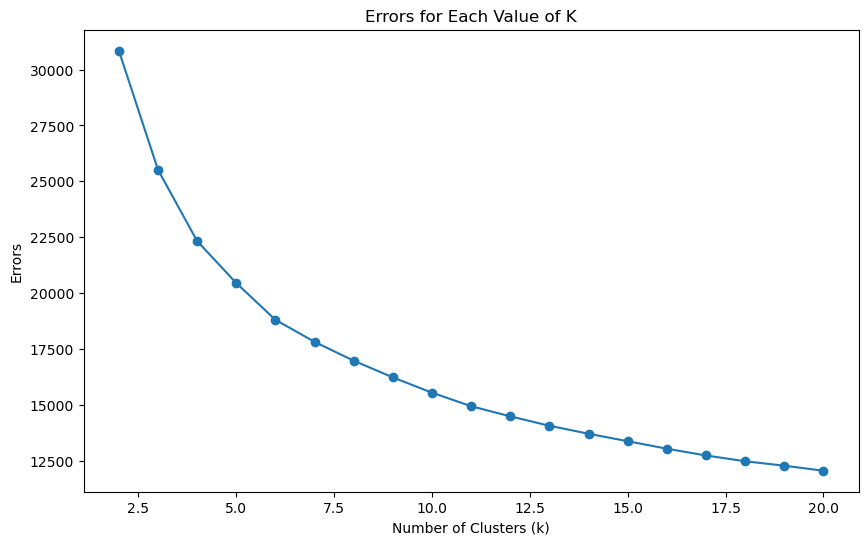

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize = (10, 6))
plt.plot(range(2, 21), error, marker = 'o')
plt.title('Errors for Each Value of K')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Errors')
plt.show()

We will use the kneed package to estimate the bend or “elbow” in the curve and display the suggested elbow value.

We will plot the Silhouette Score for each value of k.

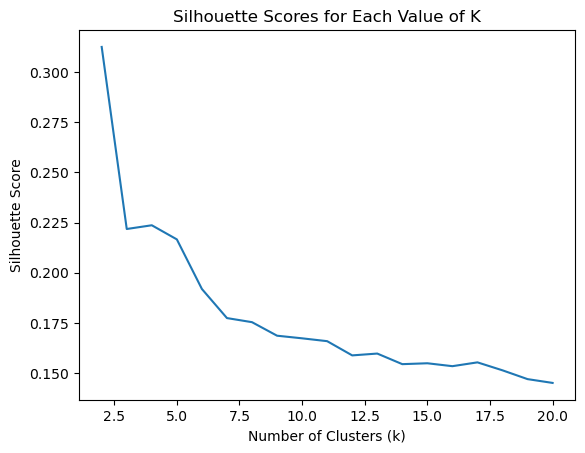

In [27]:
plt.plot(np.arange(2, 21), silhouette)
plt.title('Silhouette Scores for Each Value of K')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()

In [28]:
# Create a KMeans instance with 6 clusters and set a random state for reproducibility
kmeans = KMeans(n_clusters = 6, random_state = 789)
# Fit the KMeans model to the scaled and sampled data (X_scaled_sampled)
kmeans.fit(X_scaled_sampled)

# Assign cluster labels to each data point in X_scaled_sampled
X_scaled_sampled['cluster_label'] = kmeans.labels_

# Display the first 5 rows of the DataFrame with cluster labels
X_scaled_sampled.head(5)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,shooting,passing,dribbling,defending,attacking,skill,movement,power,mentality,goalkeeping,cluster_label
291,1.373606,2.115543,1.465680,1.550464,1.830015,1.748668,0.037498,1.944282,2.180614,0.948023,4
501,1.937889,0.934444,1.876719,-0.849343,1.959068,1.377552,2.049414,1.870951,1.404908,0.148406,4
8871,1.020930,-0.246654,-0.795038,-0.736852,1.120221,-0.979033,-1.576714,0.990972,0.310965,0.281676,0
12793,0.456648,-0.345079,0.129801,-1.580534,0.173830,-0.552250,1.090245,1.039860,-0.703419,-1.051018,2
7256,-1.377269,-0.541929,-1.206077,0.763027,-0.600490,-1.591375,-0.430389,0.013218,-0.206172,0.814753,3


This demonstrates the use of the KMeans clustering algorithm to group data points into 6 clusters. The `fit` method is applied to the scaled and sampled data, and the resulting cluster labels are added as a new column to the DataFrame. The last line displays the first 5 rows of the DataFrame, showing the original data along with their assigned cluster labels.

Now we will create and display a plot which shows a player’s attacking score on the horizontal
axis and their defending score on the vertical axis, and color each observation based on its
assigned cluster.

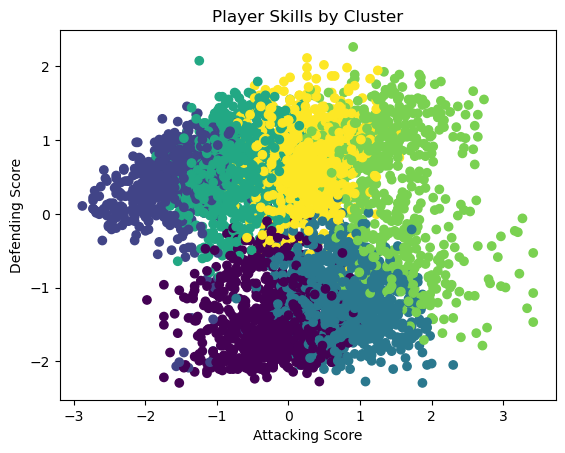

In [29]:
plt.scatter(X_scaled_sampled['attacking'], X_scaled_sampled['defending'], c = X_scaled_sampled['cluster_label'])
plt.title('Player Skills by Cluster')
plt.xlabel('Attacking Score')
plt.ylabel('Defending Score')
plt.show()